<b>1D damped wave equation for pump Rod displacement-</b>
$$ \nu^2 \dfrac {\delta^2 u}{\delta x^2} = \dfrac {\delta^2 u}{\delta t^2} + c\dfrac {\delta u}{\delta t} , \quad \textrm{where u(x,t) is displacement} \quad  $$
$$ \quad \textrm{where,} \quad \nu = \sqrt{\dfrac {144Eg}{\rho}} $$

<b>Mutiplying the above equation by A(area) and solving the above in Finite Difference method results in:</b>
$$ u_{x+1,t} = \dfrac {\{\alpha(1+c\delta t)u_{x,t+1} - [\alpha(2+c\delta t)-2\dfrac{EA}{\Delta x}]u_{x,t}  +\alpha u_{x,t-1} -\dfrac{EA}{\Delta x}u_{x-1,t} \}}{\dfrac{EA}{\Delta x}} $$
$$ \quad \textrm{where,} \quad \alpha = \dfrac {\Delta x}{t^2}[\dfrac {\rho A}{144g}] $$

<b>The surface readings are considered as Node 1 = u{0,t}
For Node 2 = u{1,t} , we apply Hooke's law -</b>
$$ F_{PR,t} = \dfrac{EA}{\Delta x}[u{1,t} - u{0,t} ] , \quad \textrm{where,} \quad F_{PR,t} = \quad \textrm{surface polish rod load} \quad $$

##### Other points till pump are calculated by above finite difference equation. Since the above equation is solved explicitly, stability criteria as given by is checked first - #####
$$ \dfrac {\Delta x}{\nu \Delta t} \leqslant 1 $$

In [82]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib as matlib
import pandas as pd
from scipy import interpolate
import math

In [83]:
E = 30.5e6 #Young's modulus(psi)
A = (np.pi/4)*pow(0.75,2) #cross section area(in^2)
L = 2000 #Rod length(ft)
Gc = 32.2 #g(ft/s^2)
Rho = 490 #rod density(lb/ft^3)
T = 15 #SPM
M = 100 #no of nodes
C = 0.8 #damping coefficient

In [84]:
df = pd.read_csv('pump_data.csv')
df.head(5)

,Rod Load,Displacement,Time
0,4085.700000,0.101680,1.0
1,4078.987202,0.111693,2.0
2,4065.397132,0.131964,3.0
3,4044.957761,0.162451,4.0
4,4017.700415,0.203108,5.0


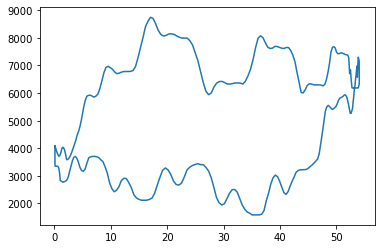

In [85]:
plt.plot(df.iloc[:,1],df.iloc[:,0])

In [86]:
arr = df.to_numpy()
Fi = arr[:,0] # defining load
Xi = arr[:,1] # defining displacement

NT = int(arr[-1,2]) # time value for a cycle
DT = 60/T/(NT - 1) # det T
DX = L/(M - 1) # del x

V = np.sqrt(144*E*Gc/Rho)
Cest = DX/V/DT #Stability criteria

if(Cest<=1):
    print('Stability criteria achieved')
else:
    print('Solution unstable')

Stability criteria achieved


In [87]:
# defining parameters for finite difference equation
Alpha = (DX/pow(DT,2))*Rho*A/144/Gc
A1 = Alpha*(1 + C*DT)/(E*A/DX)
A2 = -(Alpha*(2 + C*DT) - 2*E*A/DX)/(E*A/DX)
A3 = Alpha/(E*A/DX)
A4 = -1

# increasing time steps to make up for points where calculation is not possible
N = 2*(M -1) + NT # no of lost points = 2M - 2
Nrep = math.ceil(N/NT) # Number of surface chart repetations
N = Nrep*NT 

In [88]:
# defining solution matrix
U = np.empty((M+1,N))
U[:] = np.nan
U[0,:] = matlib.repmat(-Xi.reshape(1,-1)/12 , 1, Nrep)
U[1,:] = matlib.repmat(Fi.reshape(1,-1)*DX/(E*A), 1, Nrep) + U[0,:]

In [89]:
# calculating soulution matrix for finite difference equation
for i in range(2,M+1):
    U[i,i-1:N-i+1] = A1*U[i-1,i:N-i+2] + A2*U[i-1,i-1:N-i+1] + A3*U[i-1,i-2:N-i] + A4*U[i-2,i-1:N-i+1]

In [90]:
# calculating downhole values
Fp = E*A/DX*(U[M,:] - U[M-1,:])
Xp = -12*(U[M,:] - np.max(U[M,:][np.logical_not(np.isnan(U[M,:]))]))

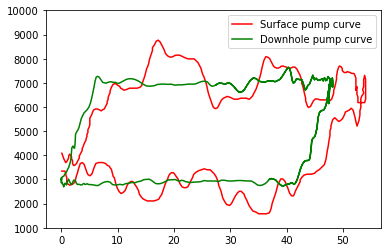

In [91]:
Fp = Fp[np.logical_not(np.isnan(Fp))]
Xp = Xp[np.logical_not(np.isnan(Xp))]

plt.plot(mat_contents_1['X'], mat_contents_1['F'], color='red')
plt.plot(Xp,Fp, color='green')
plt.legend(["Surface pump curve", "Downhole pump curve"], loc ="upper right")
plt.ylim(1000,10000)
plt.show()